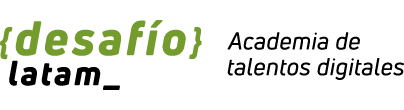

#<center><font color="green">Regresión (parte I)</font></center>

##<font color="green">Matriz de correlaciones</font>

Python nos permite determinar fácilmente las correlaciones entre cada par de variables contenidas en un dataset. En nuestro caso, utilizaremos los datos correspondientes a la base de datos de los pingüinos que vimos en la sesión anterior.


In [ ]:
#cargamos las bibliotecas y la data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing

# Cargar el conjunto de datos de pingüinos de seaborn
penguins = sns.load_dataset("penguins")

# Filtrar los datos sin valores faltantes
data = penguins.dropna()


<ipython-input-38-e21a93f463f9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)


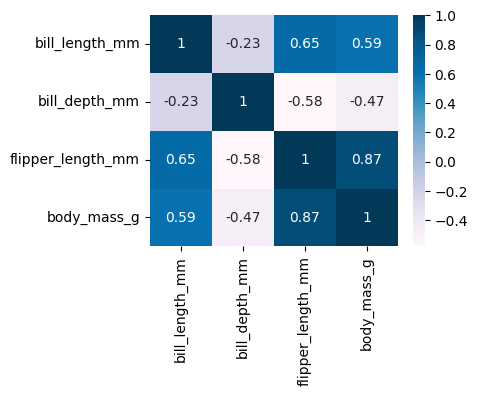

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)
'''
PuBu utiliza una gamna de colores en púrpura. Otras alternativas son:
- Viridis (cmap=plt.cm.viridis): es especialmente útil para representar datos
cuantitativos. Tiene una transición suave y uniforme de colores, lo que facilita
la interpretación de las relaciones.

- Coolwarm (cmap=plt.cm.coolwarm): Este es un mapa de color divergente que va
desde colores fríos (azules) a colores cálidos (rojos). Puede ser útil cuando
deseas resaltar diferencias positivas y negativas en tus datos.

- Greens (cmap=plt.cm.Greens): en tonos de verde

Reds (cmap=plt.cm.Reds): En tonos rojos

YlGnBu (cmap=plt.cm.YlGnBu): va desde amarillo hasta azul, pasando por tonos
verdes.

Pastel1 (cmap=plt.cm.Pastel1): Tonos pasteles

Accent (cmap=plt.cm.Accent): Tonos brillantes
'''
plt.show()

<center><strong>¡Podemos regresar a nuestra presentación!</strong></center>

##<font color="green">Regresión lineal simple</font>


Vamos a analizar, a partir de nuestra base de datos, las posibles relaciones entre las variables que presenta.

In [ ]:
data

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

Vamos a examinar primero la posible relación entre las variables. Crearemos ahora un scatterplot, para visualizar la distribución de los pesos y largos de las aletas. Para ello, primero seleccionaremos esas columnas.

In [ ]:
# Filtrar las columnas necesarias
data1 = data[["flipper_length_mm", "body_mass_g"]]

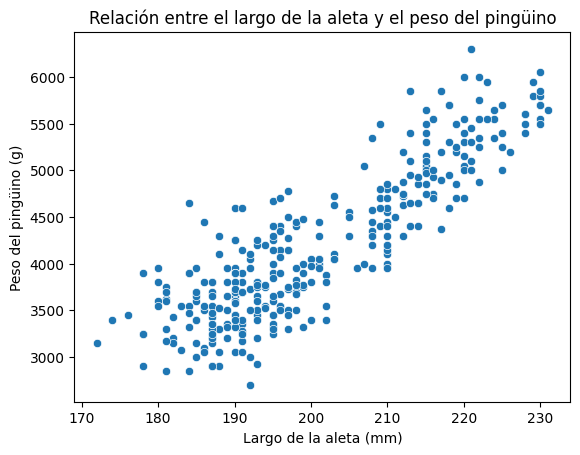

In [ ]:
# Crear una gráfica de dispersión
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=data1)
plt.title("Relación entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")
plt.show()

Intuitivamente, parece haber una correlación lineal positiva que verificaremos a continuación.

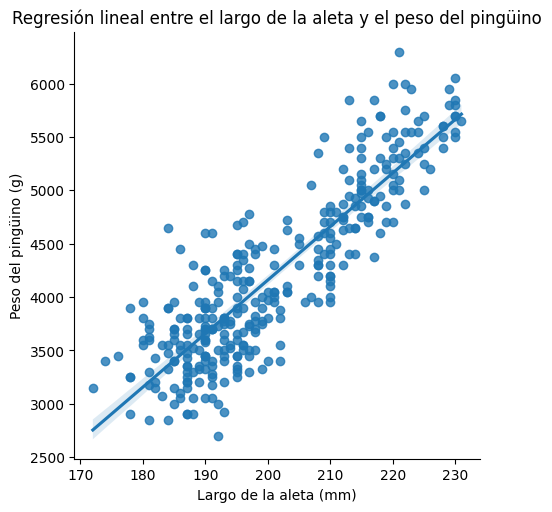

Pendiente: 50.15326594224111
Intercepto: -5872.092682842823
Error estándar: 1.5402309838246344
Coef. de correlación: 0.8729788985653613


In [ ]:
# Realizar la regresión lineal
sns.lmplot(x="flipper_length_mm", y="body_mass_g", data=data1)
plt.title("Regresión lineal entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")

# Calcular los valores de la regresión lineal. Ya veremos el significado de los parámetros
slope, intercept, r_value, p_value, std_err = stats.linregress(data["flipper_length_mm"], data["body_mass_g"])

# Mostrar el gráfico completo
plt.show()

print(f"Pendiente: {slope}")
print(f"Intercepto: {intercept}")
print(f"Error estándar: {std_err}")
print(f"Coef. de correlación: {r_value}")

Podemos analizar ahora lo que ocurre con los residuos, lo que más adelante nos permitirá evaluar nuestro modelo.

Pendiente: 50.15326594224111
Intercepto: -5872.092682842823
Error estándar: 1.5402309838246344
Coef. de correlación: 0.8729788985653613


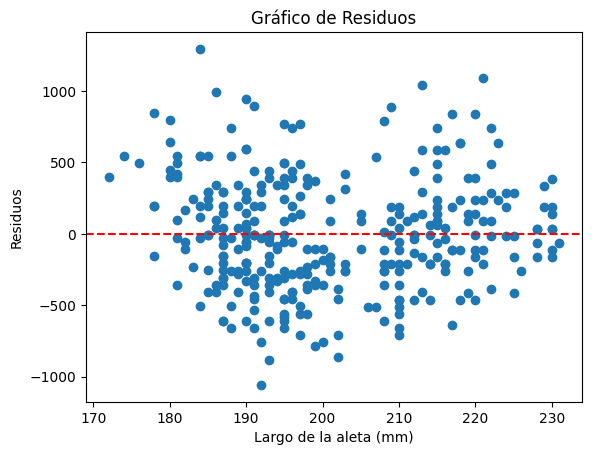

In [ ]:
residuals = data["body_mass_g"] - (slope * data["flipper_length_mm"] + intercept)

# Mostrar un gráfico de los residuos
plt.figure()
plt.scatter(data["flipper_length_mm"], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Residuos")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Residuos")
plt.show()

Podríamos ver algo más aquí sobre regresión lineal múltiple, pero para ello necesitaremos algunas herramientas más.

##<font color = 'green'>Modelo de regresión lineal con Statsmodels</font>

Utilizaremos un módulo llamado statsmodels, que tiene documentación[ aquí](https://www.statsmodels.org/stable/gettingstarted.html).

El módulo statsmodels proporciona una amplia variedad de estadísticas de salida y parámetros de ajuste. Consulta la documentación completa de la regresión statsmodels [aquí](https://www.statsmodels.org/stable/regression.html).

Statsmodels contiene una función llamada .OLS() para realizar una regresión, buscando minimizar los cuadrados de los residuos. Un detalle importante es que se necesita agregar una columna de "1" a las variables predictoras, ya que esto (por motivos más largos de explicar) permite realizar un mejor ajuste del modelo.

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.13e-105
Time:                        12:40:41   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -5872.0927    310.28

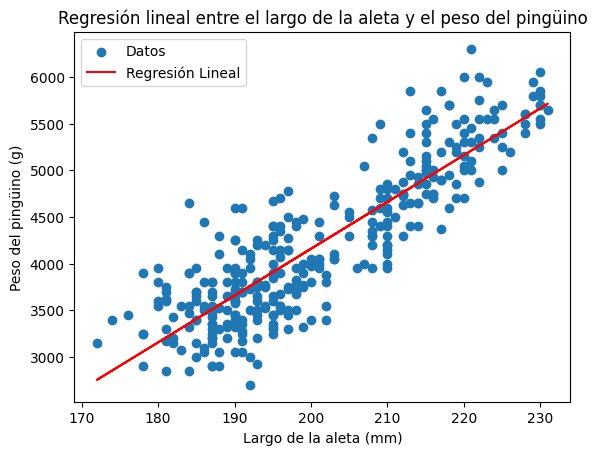

In [ ]:
import statsmodels.api as sm

#Definir las variables predictoras (X) y la variable de respuesta (y)
X = data["flipper_length_mm"]
y = data["body_mass_g"]

# Agregar una constante al predictor (intercepto)
X = sm.add_constant(X)

# Crear el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Obtener los resultados del modelo
results = model.summary()

# Imprimir los resultados
print(results)

# Graficar la regresión lineal
plt.scatter(data["flipper_length_mm"], data["body_mass_g"], label="Datos")
plt.plot(data["flipper_length_mm"], model.predict(X), color='red', label="Regresión Lineal")
plt.title("Regresión lineal entre el largo de la aleta y el peso del pingüino")
plt.xlabel("Largo de la aleta (mm)")
plt.ylabel("Peso del pingüino (g)")
plt.legend()
plt.show()



Podemos aplicar statsmodels para obtener un modelo de regresión para dos o más variables independientes. En nuestro caso, vamos a definir como variables independientes el largo de la aleta y el sexo; para esto último deberemos transformar esta variable categórica en numerica utilizando get.dummies

In [ ]:

# Paso 1: Definir variables predictoras (X) y variable de respuesta (y)
X = data[['flipper_length_mm', 'sex']]  # Largo de la aleta y sexo como variables independientes
y = data['body_mass_g']  # Peso como variable dependiente

# Codificar la variable categórica 'sex' usando get dummies
X_encoded = pd.get_dummies(X, columns=['sex'], prefix=['sex'])

# Paso 2: Agregar una constante (intercepto) a las variables predictoras
X_encoded = sm.add_constant(X_encoded)

# Paso 3: Crear el modelo de regresión lineal
model = sm.OLS(y, X_encoded).fit()

# Paso 4: Obtener resultados del modelo
results = model.summary()

predictions = model.predict(X_encoded)

# Calcular el Error Cuadrático Medio (MSE)
mse = ((y - predictions) ** 2).mean()

# Calcular el Error Cuadrático Medio Explicado (EMSE)
emse = mse / ((y - y.mean()) ** 2).mean()

# Obtener el valor R² del modelo
r2 = model.rsquared

print(results)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Error Mean Squared Explicado (EMSE): {emse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Tue, 12 Sep 2023   Prob (F-statistic):          3.53e-118
Time:                        12:42:23   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3490.9167    193.50

¿Cómo podemos interpretar los resultados que nos entrega statsmodels?



<center><strong>¡Ahora podemos regresar a nuestra presentación!<center><strong>


